# Ebola epidemic

## Lesson 3

Loading a csv file:

In [1]:
dataraw = readdlm("wikipediaEVDraw.csv", ',')

54×9 Array{Any,2}:
 "25 Nov 2015"  28637  11314  3804  2536  …  4808     14122     3955   
 "18 Nov 2015"  28634  11314  3804  2536     4808     14122     3955   
 "11 Nov 2015"  28635  11314  3805  2536     4808     14122     3955   
 "4 Nov 2015"   28607  11314  3810  2536     4808     14089     3955   
 "25 Oct 2015"  28539  11298  3806  2535     4808     14061     3955   
 "18 Oct 2015"  28476  11298  3803  2535  …  4808     14001     3955   
 "11 Oct 2015"  28454  11297  3800  2534     4808     13982     3955   
 "27 Sep 2015"  28388  11296  3805  2533     4808     13911     3955   
 "20 Sep 2015"  28295  11295  3800  2532     4808     13823     3955   
 "13 Sep 2015"  28220  11291  3792  2530     4808     13756     3953   
 "6 Sep 2015"   28147  11291  3792  2530  …  4808     13683     3953   
 "30 Aug 2015"  28073  11290  3792  2529     4808     13609     3953   
 "16 Aug 2015"  27952  11284  3786  2524     4808     13494     3952   
 ⋮                                        ⋱  

### Converting string to Date type:
'u' stands for a three letters month

In [2]:
DateTime(dataraw[1,1],"d u y")

2015-11-25T00:00:00

- We can use map and x->f(x,arg1,...) to loop with a fnctn of several arguments
- writedlm : "write with delimiter"

In [3]:
rawdays = map(x -> DateTime(x,"d u y"), dataraw[:,1])
dataraw[:,1] = map(x -> Dates.datetime2rata(x)-Dates.datetime2rata(rawdays[54]), rawdays)
writedlm("wikipediaEVDdatesconverted.csv", dataraw, ',')

## Lesson 4

Graphics using Plot and pyplot backend

In [4]:
epidays, allcases = dataraw[:,1], dataraw[:,2]

(Any[613, 606, 599, 592, 582, 575, 568, 554, 547, 540  …  123, 114, 102, 87, 66, 51, 40, 23, 9, 0], Any[28637, 28634, 28635, 28607, 28539, 28476, 28454, 28388, 28295, 28220  …  1201, 982, 779, 528, 309, 260, 239, 176, 130, 49])

In [5]:
#Pkg.add("Plots")
#Pkg.add("PyPlot")
using Plots
pyplot()

Plots.PyPlotBackend()


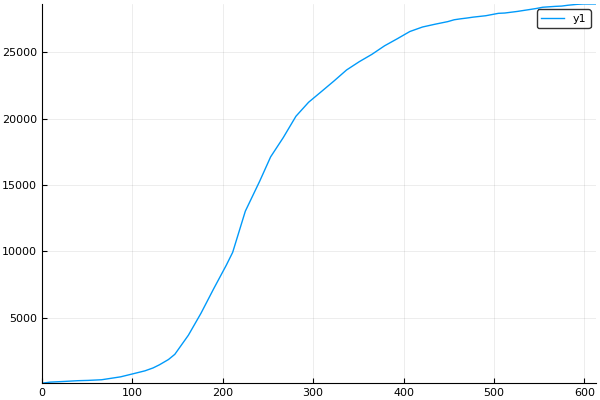

In [6]:
plot(epidays, allcases)


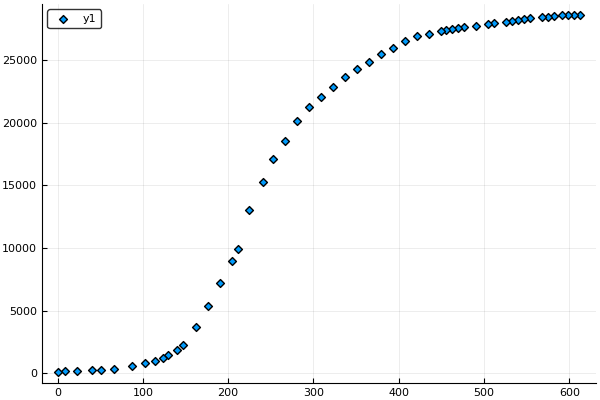

In [7]:
plot(epidays, allcases, linetype = :scatter, marker = :diamond)


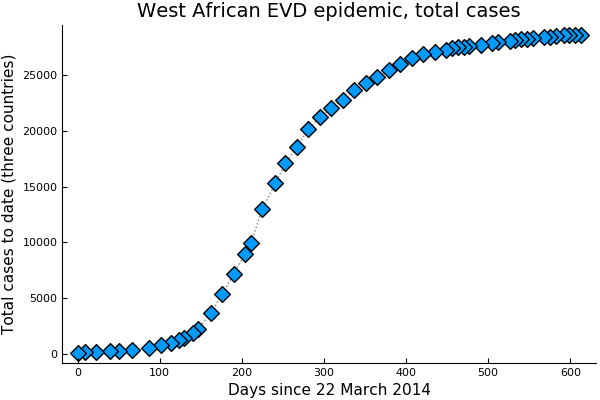

In [14]:
#From https://github.com/juanklopper/JuliaCourseNotebooks/blob/master/Week2_4-SimplePlots.ipynb

plot(epidays, allcases,   # here are the data to be plotted, below are the attributes
title       = "West African EVD epidemic, total cases", 
xlabel    = "Days since 22 March 2014",
ylabel    = "Total cases to date (three countries)",
marker  = (:diamond, 8),  # note the use of  parentheses to group the marker attributes into a composite of attributes 
line         = (:path, :dot, :grey),   # line attributes likewise put together as one unit by the use of parantheses
legend   = false,
grid        = false)    

# A nice thing: this layout permits us add comments to individual parts of  the function call. 
# Also, notice that it helps readibility to line up vertically all the assignment "=" signs


In [15]:
savefig("WAfricanEVD.png") 

## Replacing the non numeric values by zero


In [23]:
rows, cols = size(dataraw)
for i in 1:rows for j in 1:cols
    if !all(isnumber, string(dataraw[i,j])) dataraw[i,j] = 0 end
end end


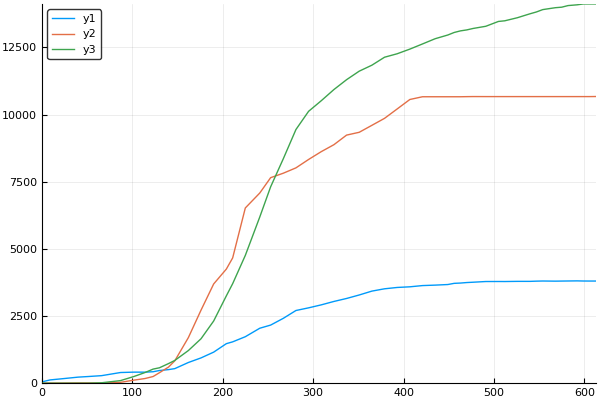

In [25]:
EVDcasesbycountry = dataraw[:, [4, 6, 8]]
plot(epidays, EVDcasesbycountry)


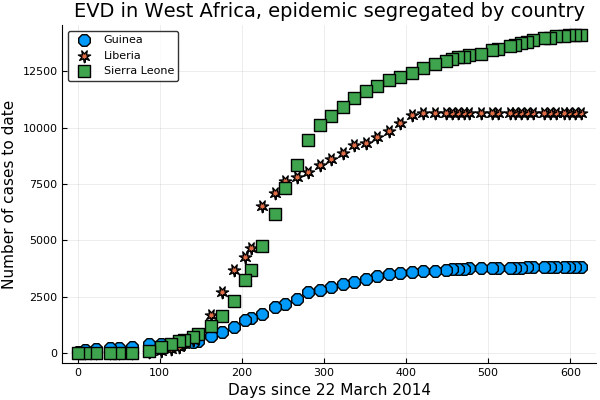

In [27]:
plot(epidays, EVDcasesbycountry,
legend = :topleft,
marker = ([:octagon :star7 :square], 9),
label     = ["Guinea" "Liberia" "Sierra Leone"],
title      = "EVD in West Africa, epidemic segregated by country",
xlabel   = "Days since 22 March 2014",
ylabel   = "Number of cases to date",
line = (:scatter)
)


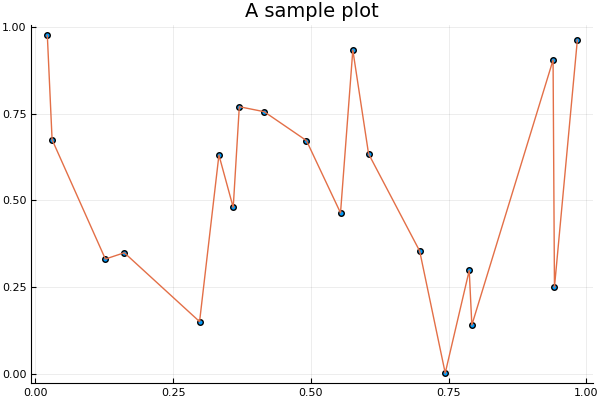

In [40]:
n = 20
x = sort(rand(20)); y = rand(20)
Plots.scatter(x, y)
plot!(x,y, leg=false, title = "A sample plot")


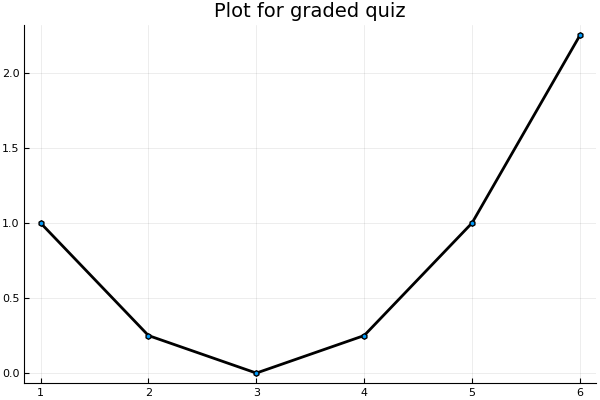

In [53]:
x = [1, 2, 3, 4, 5, 6]
y = (x-3).^2/4
plot(x,y, marker = :hex, leg=false, linewidth = 2, linecolor=:black)
plot!(title="Plot for graded quiz")